# Explore here

In [67]:
from dotenv import load_dotenv
import os
import pandas as pd

load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


spotify = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

sebas_uri = 'spotify:artist:07YUOmWljBTXwIseAUd9TW'

results = spotify.artist_top_tracks(sebas_uri)
tracks = results["tracks"]

track_info = []
for track in tracks:
    track_name = track['name']
    popularity = track['popularity']
    duration_ms = track['duration_ms']

    duration_min = duration_ms / 60000

    track_info.append({
        'Track Name': track_name,
        'Popularity': popularity,
        'Duration (min)': duration_min
    })

df = pd.DataFrame(track_info)

df_sorted = df.sort_values(by="Popularity", ascending=False)

top_3 = df_sorted.head(3)

print(top_3)

       Track Name  Popularity  Duration (min)
0       VAGABUNDO          86        3.593333
1   Tacones Rojos          78        3.155550
2  Pareja Del Año          78        3.255550


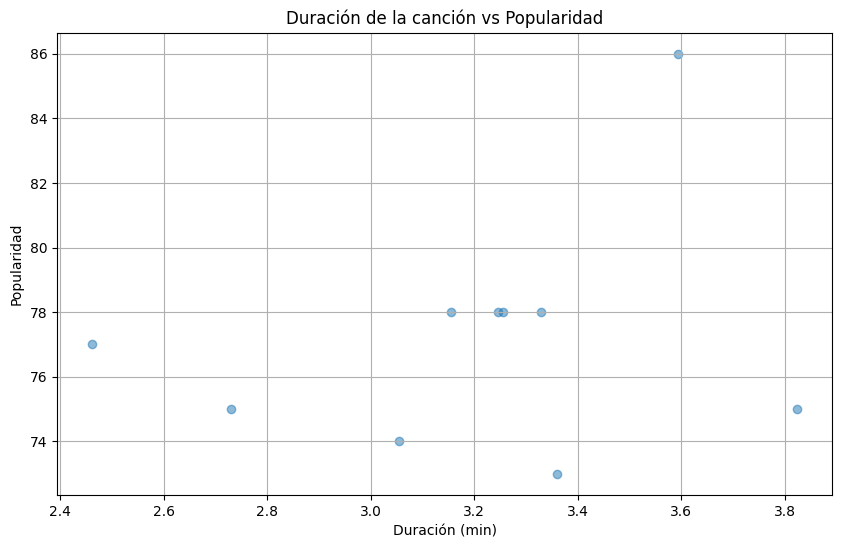

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df["Duration (min)"], df["Popularity"], alpha=0.5)
plt.title('Duración de la canción vs Popularidad')
plt.xlabel('Duración (min)')
plt.ylabel('Popularidad')
plt.grid(True)
plt.show()

No existe ninguna relación entre la duración y la popularidad, hay canciones cortas populares y canciones largas populares